Sumber Dataset: https://www.kaggle.com/mloey1/ahcd1

In [5]:
# Masukin token kaggle ke google colab
# Download dataset dari kaggle
# Pastikan file kaggle.json udah ada di .kaggle
import zipfile,os
!kaggle datasets download -d mloey1/ahcd1

if not os.path.exists('../dataset/'):
    os.mkdir('../dataset/')

local_zip = 'ahcd1.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('../dataset/')
zip_ref.close()

os.remove('ahcd1.zip')


  0%|          | 0.00/24.0M [00:00<?, ?B/s]
  4%|4         | 1.00M/24.0M [00:00<00:08, 2.77MB/s]
  8%|8         | 2.00M/24.0M [00:01<00:14, 1.57MB/s]
 13%|#2        | 3.00M/24.0M [00:02<00:15, 1.39MB/s]
 17%|#6        | 4.00M/24.0M [00:02<00:15, 1.32MB/s]
 21%|##        | 5.00M/24.0M [00:03<00:15, 1.28MB/s]
 25%|##5       | 6.00M/24.0M [00:04<00:15, 1.25MB/s]
 29%|##9       | 7.00M/24.0M [00:05<00:14, 1.24MB/s]
 33%|###3      | 8.00M/24.0M [00:06<00:13, 1.24MB/s]
 38%|###7      | 9.00M/24.0M [00:07<00:12, 1.23MB/s]
 42%|####1     | 10.0M/24.0M [00:08<00:11, 1.22MB/s]
 46%|####5     | 11.0M/24.0M [00:09<00:11, 1.22MB/s]
 50%|#####     | 12.0M/24.0M [00:10<00:11, 1.09MB/s]
 54%|#####4    | 13.0M/24.0M [00:12<00:14, 819kB/s] 
 58%|#####8    | 14.0M/24.0M [00:14<00:14, 715kB/s]
 63%|######2   | 15.0M/24.0M [00:15<00:11, 796kB/s]
 67%|######6   | 16.0M/24.0M [00:15<00:09, 883kB/s]
 71%|#######   | 17.0M/24.0M [00:16<00:07, 965kB/s]
 75%|#######5  | 18.0M/24.0M [00:17<00:06, 1.03MB/s]
 79%|

In [5]:
# Check if tensorflow running on GPU

import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
import pandas as pd
import numpy as np

# baca file csv dari dataset ke pandas biar mudah

# file training
train_images = pd.read_csv('../dataset/csvTrainImages 13440x1024.csv') 
train_labels = pd.read_csv('../dataset/csvTrainLabel 13440x1.csv') 

# file test
test_images = pd.read_csv('../dataset/csvTestImages 3360x1024.csv') 
test_labels = pd.read_csv('../dataset/csvTestLabel 3360x1.csv') 

# cek dimensi dari file training
print("Train Images Dimension: ", train_images.shape)
print("Train Labels Dimension: ", train_labels.shape)

# berapa banyak label
print("Test Images Dimension: ", test_images.shape)
print("Test Labels DimensionL ", test_labels.shape)


# berapa banyak label di file training dan file test
print("How many labels in the train dataset: ", train_labels.iloc[:,0].unique())
print("How many labels in the test dataset: ", test_labels.iloc[:,0].unique())
num_classes = len(train_labels.iloc[:,0].unique())
print("Number of classes: ", num_classes)


# dimensi dari gambar, seberapa besar?
dim = np.sqrt(1024).astype('int64')
print("Dimension of Images: ", dim)

Train Images Dimension:  (13439, 1024)
Train Labels Dimension:  (13439, 1)
Test Images Dimension:  (3359, 1024)
Test Labels DimensionL  (3359, 1)
How many labels in the train dataset:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]
How many labels in the test dataset:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]
Number of classes:  28
Dimension of Images:  32


In [7]:
# Konversi dari dataframe pandas ke numpy array

# untuk file training
train_images = train_images.values
train_labels = train_labels.values
print("Train Images Datatype: ", type(train_images))
print("Train Labels Datatype: ", type(train_labels))

# untuk file test
test_images = test_images.values
test_labels = test_labels.values
print("Test Images Datatype: ", type(test_images))
print("Test Labels Datatype: ", type(test_labels))

Train Images Datatype:  <class 'numpy.ndarray'>
Train Labels Datatype:  <class 'numpy.ndarray'>
Test Images Datatype:  <class 'numpy.ndarray'>
Test Labels Datatype:  <class 'numpy.ndarray'>


In [8]:
# ubah gambar dari bentuk satu dimensi ke 2 dimensi

train_img = train_images.reshape(-1, dim, dim)
test_img = test_images.reshape(-1, dim, dim)

print("Train Image Dimension After Reshape: ", train_img.shape)
print("Test Image Dimension After Reshape: ", test_img.shape)

Train Image Dimension After Reshape:  (13439, 32, 32)
Test Image Dimension After Reshape:  (3359, 32, 32)


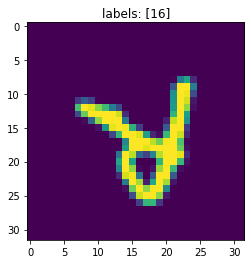

In [9]:
# melihat gambar yang ada di csv tadi

import matplotlib.pyplot as plt
plt.imshow(train_img[121])
plt.title(f"labels: {train_labels[121]}")
plt.show()

In [10]:
# Split dataset ke train sama validasi sebesar 20%

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_img, train_labels, test_size = 0.3, random_state=123)

print("Train Image Dimension After Split: ", X_train.shape)
print("Validation Image Dimension After Split: ", X_val.shape)
print("Train Label Dimension After Split: ", y_train.shape)
print("Validation Label Dimension After Split: ", y_val.shape)

Train Image Dimension After Split:  (9407, 32, 32)
Validation Image Dimension After Split:  (4032, 32, 32)
Train Label Dimension After Split:  (9407, 1)
Validation Label Dimension After Split:  (4032, 1)


In [11]:
# one encoding label, ubah label menjadi kategorikal tadinya 1 jadi 28

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes+1)
y_val = to_categorical(y_val, num_classes+1)
test_labels = to_categorical(test_labels, num_classes+1)

print("Train Labels Dimension After Reshape: ",  y_train.shape)
print("Validation Labels Dimension After Reshape: ", y_val.shape)
print("Test Labels Dimension After Reshape: ", test_labels.shape)

Train Labels Dimension After Reshape:  (9407, 29)
Validation Labels Dimension After Reshape:  (4032, 29)
Test Labels Dimension After Reshape:  (3359, 29)


In [12]:
# normalisasi gambar
X_train = X_train/255.
X_val = X_val/255.
test_img = test_img/255.

# tambahin dimensi gambar, supaya gambar tersebut punya depth warna
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
test_img = np.expand_dims(test_img, axis=-1)

print("Train Image Dimension After Reshape: ",  X_train.shape)
print("Validation Image Dimension After Reshape: ", X_val.shape)
print("Test Image Dimension After Reshape: ", test_img.shape)

Train Image Dimension After Reshape:  (9407, 32, 32, 1)
Validation Image Dimension After Reshape:  (4032, 32, 32, 1)
Test Image Dimension After Reshape:  (3359, 32, 32, 1)


In [13]:
# masukan parameter training disini, kita pakai convolutional neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(128, (3,3), input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(64, (3,3) ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes+1, activation='softmax')) # pake softmax karena label berupa kategori

# masukan parameter compile disini
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# lihat semua parameter yang ada
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        73792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

In [14]:
# training dataset
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('val_accuracy') > (0.90)):
            print("\nSTOPPU")
            self.model.stop_training = True

callbacks = myCallback()

history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=200, 
                    batch_size=64, 
                    verbose=1,
                    callbacks=[callbacks])

Epoch 1/200
147/147 [==============================] - 20s 79ms/step - loss: 2.6350 - accuracy: 0.2351 - val_loss: 1.1856 - val_accuracy: 0.6243
Epoch 2/200
147/147 [==============================] - 9s 64ms/step - loss: 0.9080 - accuracy: 0.7048 - val_loss: 0.6972 - val_accuracy: 0.7758
Epoch 3/200
147/147 [==============================] - 9s 64ms/step - loss: 0.4394 - accuracy: 0.8587 - val_loss: 0.5932 - val_accuracy: 0.8135
Epoch 4/200
147/147 [==============================] - 9s 64ms/step - loss: 0.2717 - accuracy: 0.9109 - val_loss: 0.5585 - val_accuracy: 0.8358
Epoch 5/200
147/147 [==============================] - 9s 63ms/step - loss: 0.1781 - accuracy: 0.9431 - val_loss: 0.6025 - val_accuracy: 0.8306
Epoch 6/200
147/147 [==============================] - 9s 63ms/step - loss: 0.1115 - accuracy: 0.9650 - val_loss: 0.5983 - val_accuracy: 0.8400
Epoch 7/200
147/147 [==============================] - 9s 63ms/step - loss: 0.0958 - accuracy: 0.9698 - val_loss: 0.6225 - val_accuracy

KeyboardInterrupt: 

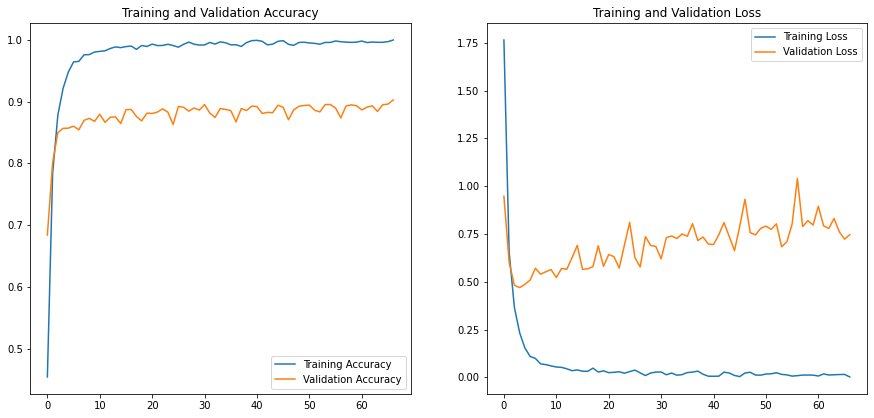

In [16]:
# lihat akurasi model

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(67)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
# coba evaluasi pake data testing

eval = model.evaluate(test_img, test_labels, batch_size=32)

print(f"Accuracy {eval[1]*100:.2f}%")
print(f"Loss {eval[0]*100:.2f}%")

105/105 [==============================] - 1s 4ms/step - loss: 0.7414 - accuracy: 0.9071
Accuracy 90.71%
Loss 74.14%


Arabic alphabet:
ي و ه ن م ل ك ق ف غ ع ظ ط ض ص ش س ز ر ذ د خ ح ج ث ت ب ا
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28

Predicted index:  [3, 6, 28, 6, 2, 17, 14, 21, 20, 15]

Real index:  [3, 6, 28, 6, 2, 17, 14, 21, 20, 15]



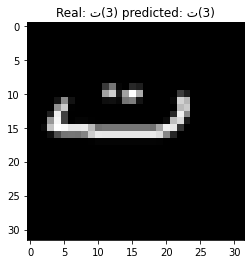

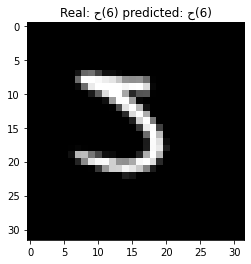

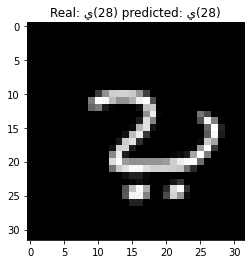

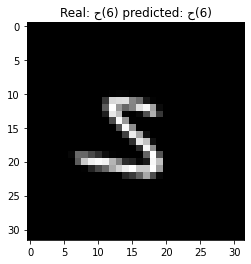

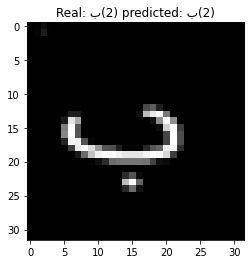

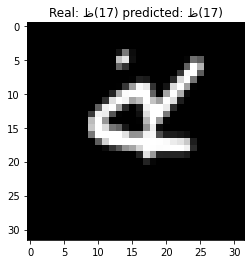

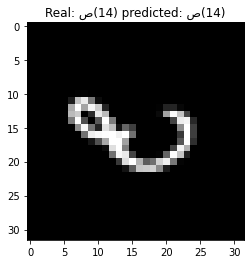

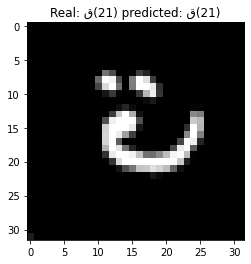

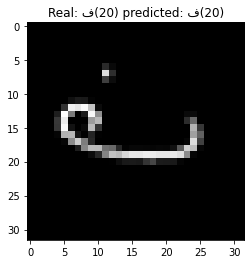

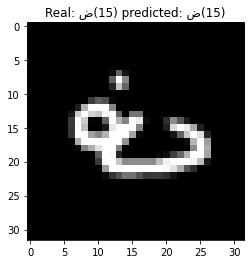

In [18]:
# coba prediksi data testing

from sklearn.utils import shuffle
import cv2 as cv

X_test, y_test = shuffle(test_img, test_labels, random_state=30)

y_test = y_test[:10]
X_test = X_test[:10]

print('Arabic alphabet:')
print("ي و ه ن م ل ك ق ف غ ع ظ ط ض ص ش س ز ر ذ د خ ح ج ث ت ب ا\n1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28")
print()

pred = model.predict(X_test)

outputDf = pd.DataFrame(pred)

predictedIndex = list(outputDf.idxmax(axis=1))

print("Predicted index: ", predictedIndex)
print()

y_test = pd.DataFrame(y_test)
realIndex = list(y_test.idxmax(axis=1))

print("Real index: ", realIndex)

arabic_alphabet = "ي و ه ن م ل ك ق ف غ ع ظ ط ض ص ش س ز ر ذ د خ ح ج ث ت ب ا"
arabic_alphabet = arabic_alphabet.split()

print()

for i in range(len(X_test)):
    real = realIndex[i]
    predicted = predictedIndex[i]
    plt.title(f'Real: {arabic_alphabet[-real]}({real}) predicted: {arabic_alphabet[-predicted]}({predicted})')
    img = X_test[i]
    img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
    plt.imshow(img,cmap='gray')
    plt.show()

In [19]:
model.save('../model/arabic_handwriting.h5')